# Data Inspection

# Objective
Load data and inspect for any anomalies.

# 1. Load Libraries and data

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

In [3]:
# Ploting Libraries
import matplotlib.pyplot as plt  

In [4]:
# Seaborn for Statistical Plots
import seaborn as sns

In [5]:
# Stats model
import statsmodels.api as sm

In [6]:
# Let us break the X and y dataframes into training set and test set.
from sklearn.model_selection import train_test_split

In [7]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

In [9]:
#import warnings
#warnings.filterwarnings('always')
np.seterr(divide='ignore', invalid='ignore')

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Load Data
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [11]:
# Print Header of the file
loan_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# On observing the data it is clear there are a few errors such as negative values in the experience column.
# There are also what might seem light outliers in the Mortgage column but on further investigation of the dataset
# it is clear these are values that are valid.
# There is also a very correlation between age and experience 


In [12]:
# Drop the "ID" and "ZIP Code" column as it is useless for the model
loan_df = loan_df.drop('ID', axis=1)
loan_df = loan_df.drop('ZIP Code', axis=1)
# Drop experience due to high correlation
loan_df = loan_df.drop('Experience', axis=1)

In [13]:
# Print Header of the file
loan_df.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


# 2. Check how many records do we have

In [14]:
# Check shape of dataset
loan_df.shape

(5000, 11)

In [15]:
# Test whether there is any null value in the dataset or not.
loan_df.isnull().sum()

In [16]:
# Check dataset type
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [17]:
# Analysze the distribution of the dependent (Personal Loan) column
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [18]:
# Check for negative numbers and change to zero
#num[num < 0] = (np.negative(num))
#loan_df['Experience'].apply(abs)
#loan_df['Experience'] = loan_df['Experience'].abs()

In [19]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


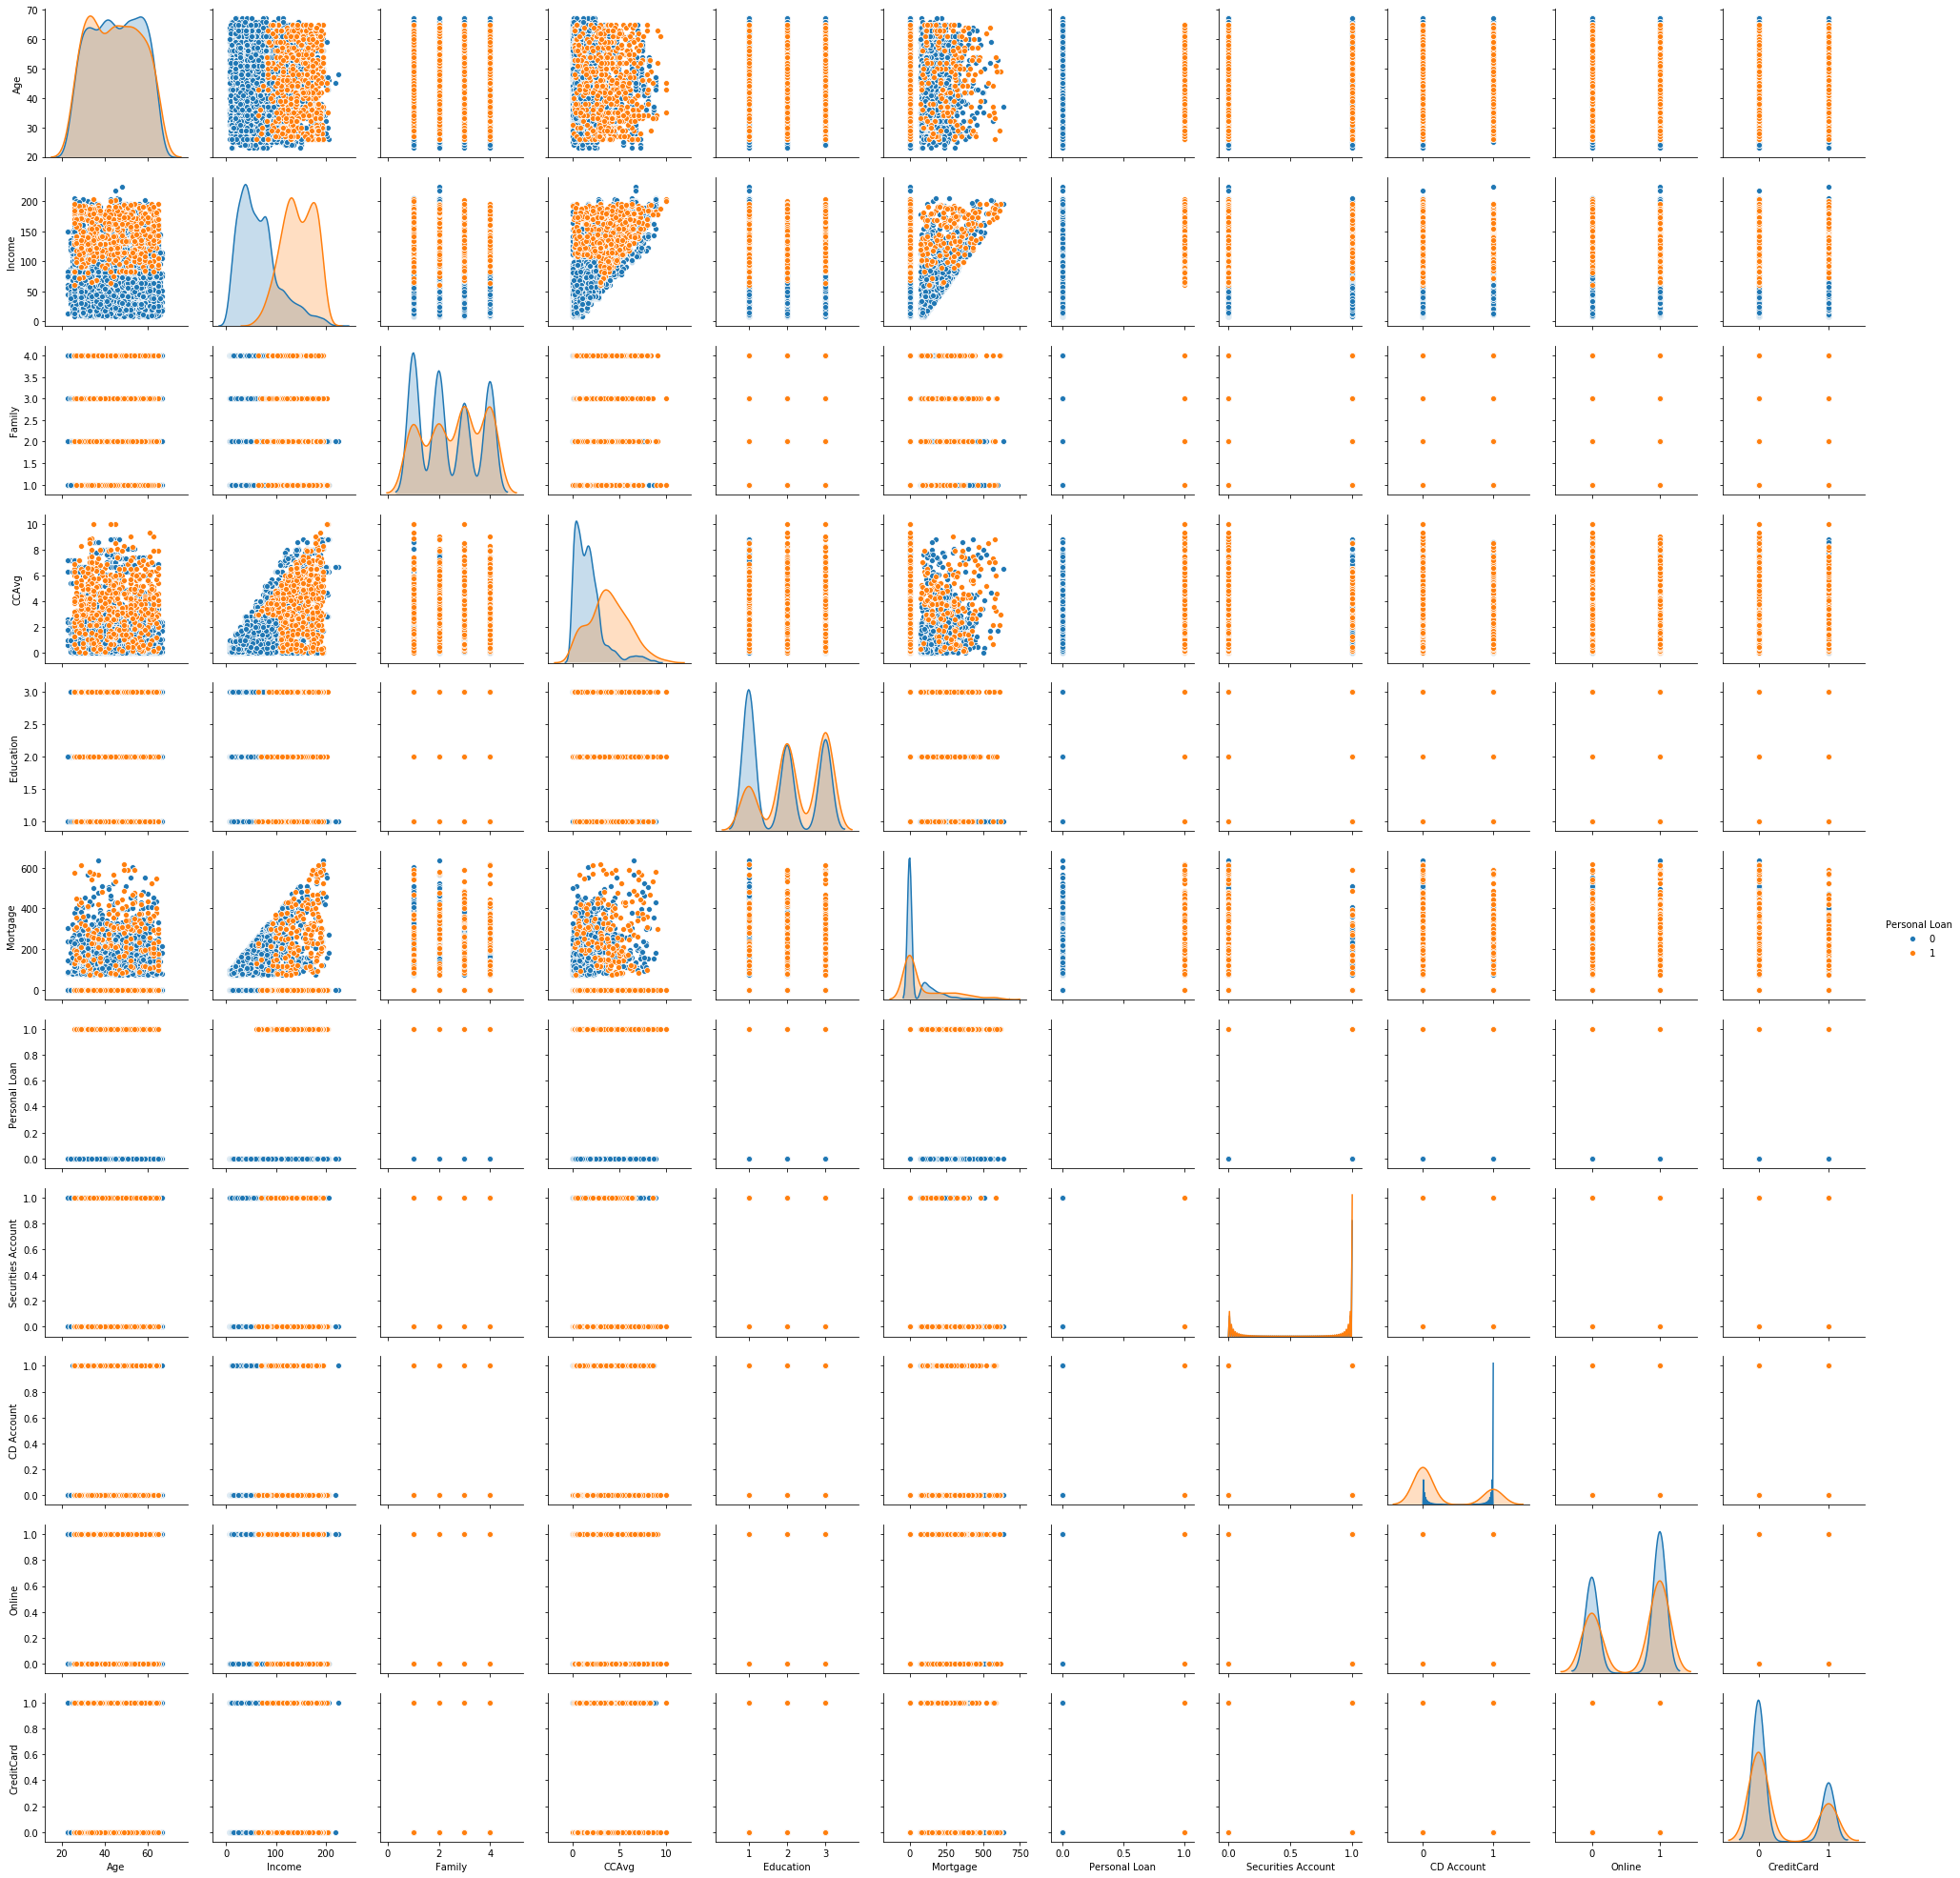

In [20]:
# Scatter Matrix
loan_df_attr = loan_df.iloc[:, 0:11]
# Density Curve
sns.pairplot(loan_df_attr, diag_kind='kde', hue = 'Personal Loan')

In [21]:
# Plot Histogram
#sns.pairplot(loan_df_attr)

In [22]:
# Look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
loan_df.groupby(["Personal Loan"]).count()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480


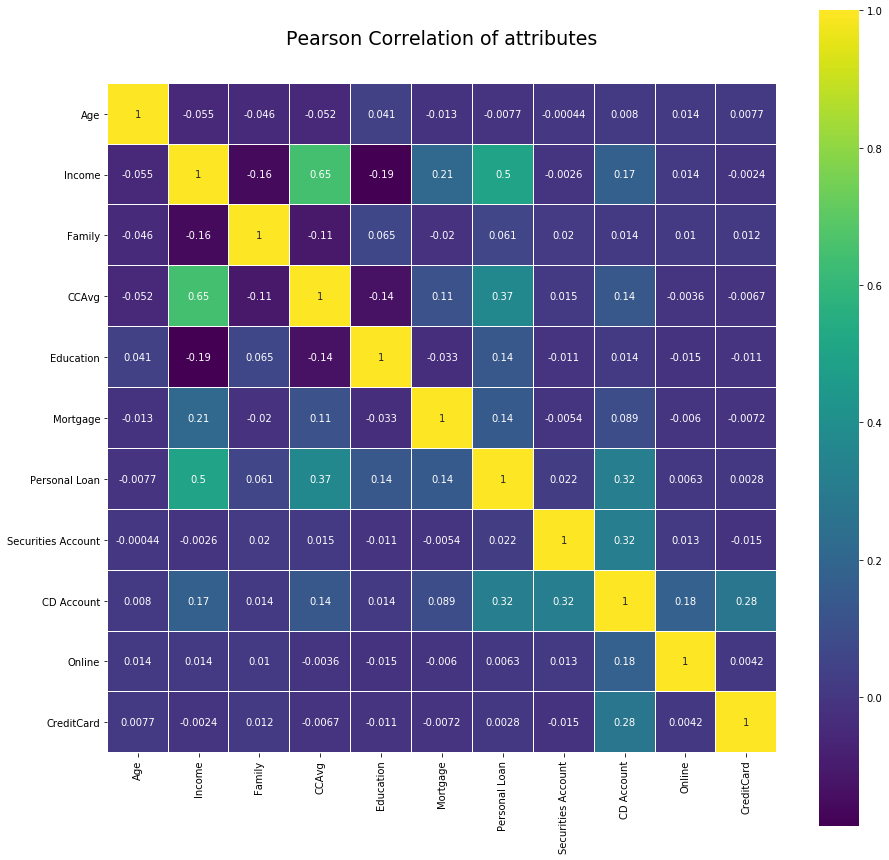

In [23]:
# Check for Correlation
#loan_df.corr()

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(loan_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Data Slicing

In [24]:
array = loan_df.values
X = loan_df.iloc[:,0:6]
y = loan_df.iloc[:,6]
#X = array[:,0:11] # select all rows and first 12 columns which are the attributes
#Y = array[:,7]   # select all rows and the 8th column which is the classification "Yes", "No" for loans
test_size = 0.30 # taking 70:30 training and test set
seed = 1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [25]:
# Call Nearest Neighbour Algorithm
K = 5
NNH = KNeighborsClassifier(n_neighbors = K , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [26]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model.
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.912

In [27]:
# Calculate accuracy measures and confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1309   42]
 [  90   59]]


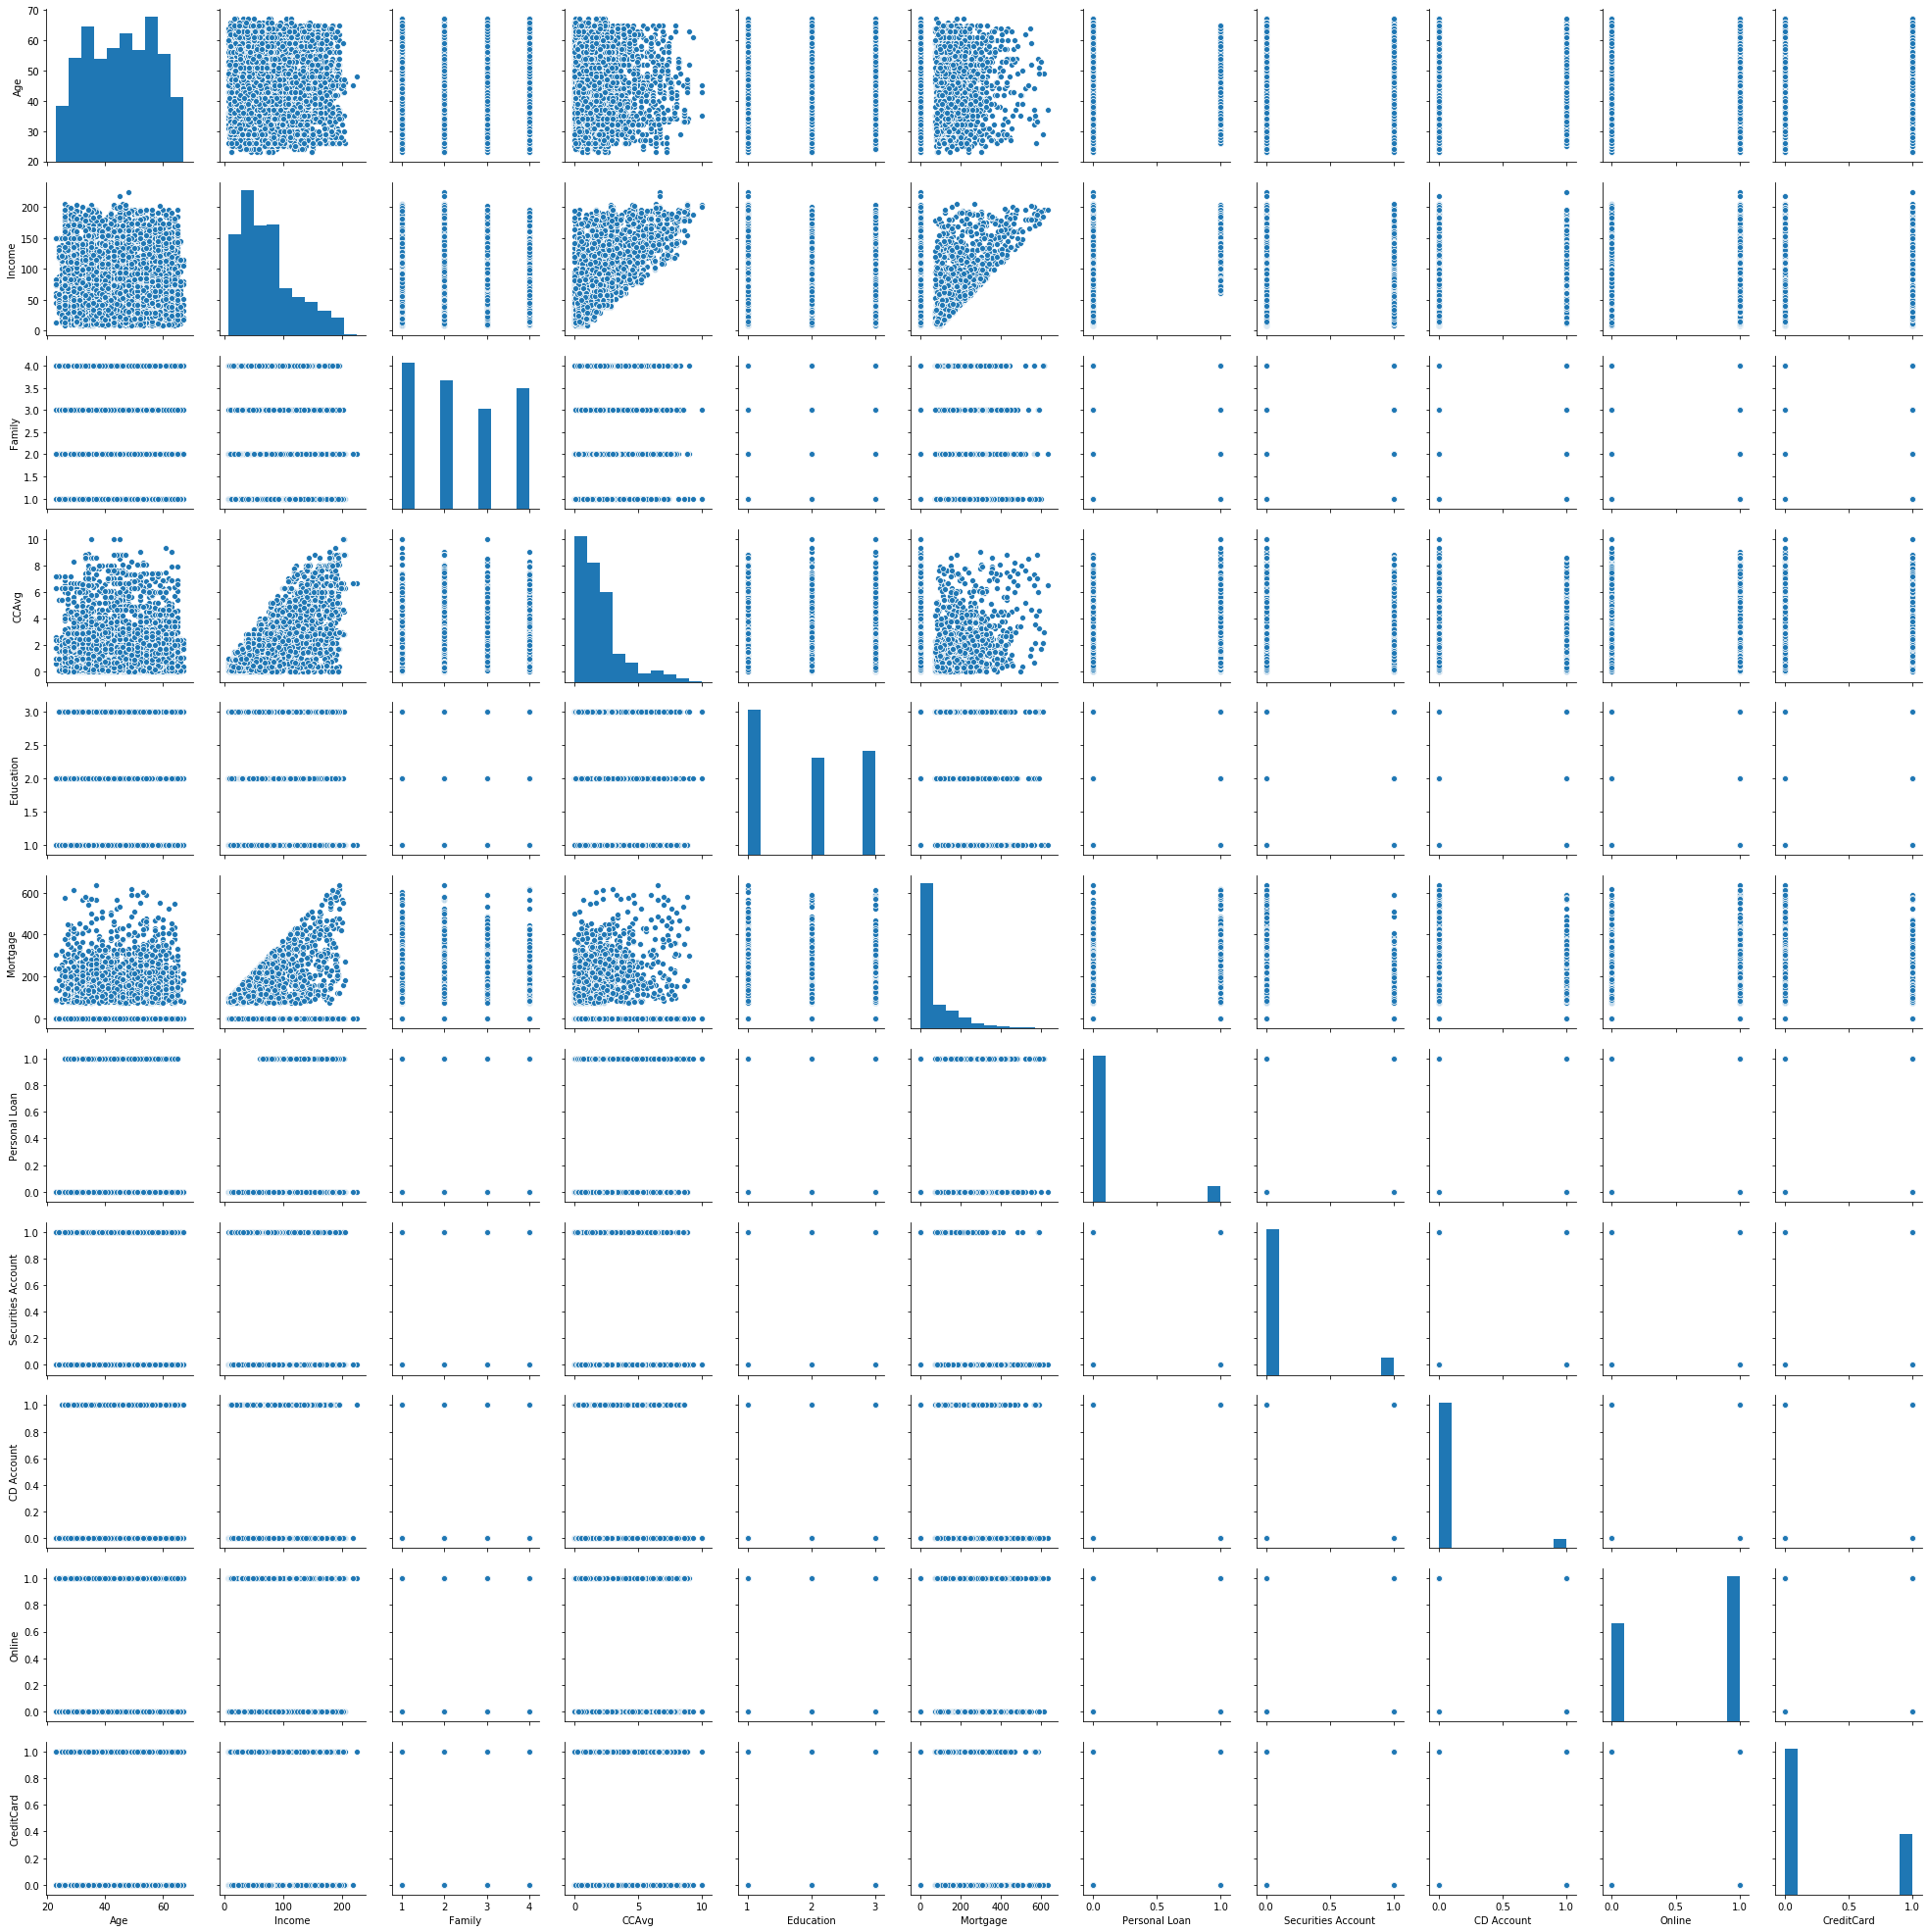

In [28]:
# Analyze the different attributes for distribution and the correlation by using scatter matrix
sns.pairplot(loan_df)

# Cross Validation

In [29]:
# Creating odd list of k
myList = list(range(1,20))

# Subsetting
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [30]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    print(accuracy_score(y_test, y_pred))

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
K = optimal_k

0.9086666666666666
0.91
0.9086666666666666
0.9033333333333333
0.906
0.908
0.9093333333333333
0.9073333333333333
0.9066666666666666
0.904
The optimal number of neighbors is 3


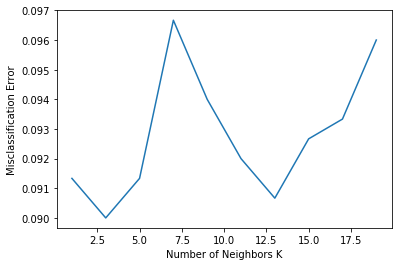

In [31]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [32]:
# Plot for new k
#sns.pairplot(loan_df)

In [33]:
# Test new k
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.912

In [34]:
print(accuracy_score(y_test, y_pred))

0.904


In [35]:
NNH_score = NNH.score(X_test, y_test)
predicted = NNH.predict(X_test)
print(NNH_score)
print(metrics.confusion_matrix(y_test, predicted))

0.912
[[1309   42]
 [  90   59]]


In [36]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.141646
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.547      
Dependent Variable: Personal Loan    AIC:              1005.5222  
Date:               2019-08-08 18:01 BIC:              1048.6458  
No. Observations:   3500             Log-Likelihood:   -495.76    
Df Model:           6                LL-Null:          -1095.5    
Df Residuals:       3493             LLR p-value:      6.4577e-256
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
const      -14.2174    0.7599  -18.7086  0.0000  -15.7069  -12.7279
Age          0.0095    0.0073    1.2917  0.1965   -0.0049    0.0238
Income       0.0538    0.0029   18.4115  0.0000    0.0480    0.0595
Family       0.7293    0.0854    8.5411  0.0000    0.5620    0.8967
CCAvg        0.1728    0.0446    3.8768  0.0001    0.0854    0.2602
Education    1.6776    0.1288   13.0240  0.0000    1.4251    1.9300
Mortgage     0.0008    0.0006    1.2995  0.1938   -0.0004    0.0021
==================================================================

"""